# Load and preprocess the model

In [28]:
import os
from pathlib import Path

train_path = "C:\\Users\\Addmin\\Desktop\\pets emotion detection\\Master Folder\\train"
test_path = "C:\\Users\\Addmin\\Desktop\\pets emotion detection\\Master Folder\\test"
valid_path = "C:\\Users\\Addmin\\Desktop\\pets emotion detection\\Master Folder\\valid"

# Function to load data from a directory
def load_data(data_path):
    data = []
    for folder in os.listdir(data_path):
        folder_path = os.path.join(data_path, folder)
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                data.append((file, folder, file_path))
    return data

train_data = load_data(train_path)
test_data = load_data(test_path)
valid_data = load_data(valid_path)


# Build and train the model

In [30]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import cv2
import os

# Define image dimensions
img_height, img_width = 128, 128

# Function to preprocess images using OpenCV
def preprocess_image(file_path):
    image = cv2.imread(file_path)
    image = cv2.resize(image, (img_width, img_height))
    image = image / 255.0
    return image

# Preprocess all data and encode labels
def preprocess_data(data_path):
    images = []
    labels = []
    label_encoder = LabelEncoder()
    
    for folder in os.listdir(data_path):
        folder_path = os.path.join(data_path, folder)
        if os.path.isdir(folder_path):
            label = folder  # Folder name is the label
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                images.append(preprocess_image(file_path))
                labels.append(label)
    
    # Encode labels
    labels_encoded = label_encoder.fit_transform(labels)
    return np.array(images), labels_encoded

# Load and preprocess train, test, and validation data
train_images, train_labels = preprocess_data("C:\\Users\\Addmin\\Desktop\\pets emotion detection\\Master Folder\\train")
test_images, test_labels = preprocess_data("C:\\Users\\Addmin\\Desktop\\pets emotion detection\\Master Folder\\test")
valid_images, valid_labels = preprocess_data("C:\\Users\\Addmin\\Desktop\\pets emotion detection\\Master Folder\\valid")

# Split data for training and validation
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Convert labels to TensorFlow format
train_labels = tf.keras.utils.to_categorical(train_labels)
val_labels = tf.keras.utils.to_categorical(val_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 128)     

C:\Users\Addmin\AppData\Roaming\Python\Python39\site-packages\keras\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


800/800 [==============================] - 145s 182ms/sample - loss: 1.4521 - accuracy: 0.2425 - val_loss: 1.3853 - val_accuracy: 0.2850
Epoch 2/10
800/800 [==============================] - 168s 210ms/sample - loss: 1.3820 - accuracy: 0.2862 - val_loss: 1.3812 - val_accuracy: 0.2150
Epoch 3/10
800/800 [==============================] - 185s 232ms/sample - loss: 1.3749 - accuracy: 0.3063 - val_loss: 1.3554 - val_accuracy: 0.4000
Epoch 4/10
800/800 [==============================] - 131s 164ms/sample - loss: 1.3339 - accuracy: 0.3638 - val_loss: 1.3433 - val_accuracy: 0.2800
Epoch 5/10
800/800 [==============================] - 117s 146ms/sample - loss: 1.2821 - accuracy: 0.3988 - val_loss: 1.3074 - val_accuracy: 0.3500
Epoch 6/10
800/800 [==============================] - 108s 135ms/sample - loss: 1.1201 - accuracy: 0.5175 - val_loss: 1.2879 - val_accuracy: 0.4100
Epoch 7/10
800/800 [==============================] - 107s 134ms/sample - loss: 1.0055 - accuracy: 0.5763 - val_loss: 1.383

Test Loss: 3.3686202952736304
Test Accuracy: 0.2368421107530594


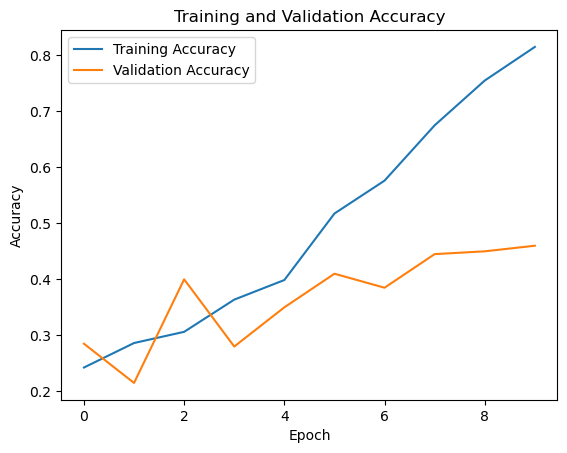

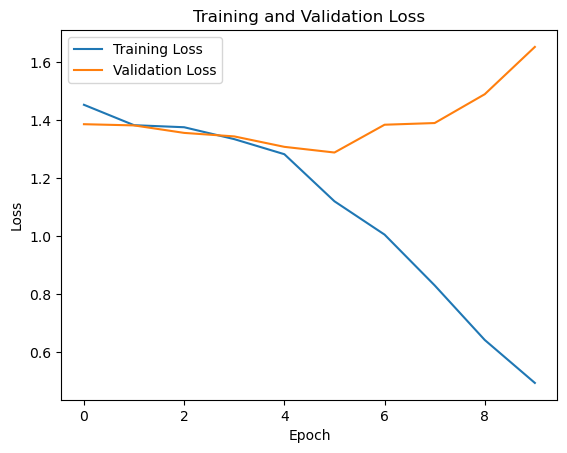

In [32]:
import matplotlib.pyplot as plt

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [34]:
from sklearn.preprocessing import LabelEncoder

# Load and preprocess train, test, and validation data
train_images, train_labels = preprocess_data("C:\\Users\\Addmin\\Desktop\\pets emotion detection\\Master Folder\\train")
test_images, test_labels = preprocess_data("C:\\Users\\Addmin\\Desktop\\pets emotion detection\\Master Folder\\test")
valid_images, valid_labels = preprocess_data("C:\\Users\\Addmin\\Desktop\\pets emotion detection\\Master Folder\\valid")

# Split data for training and validation
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.transform(val_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Convert labels to TensorFlow format
train_labels = tf.keras.utils.to_categorical(train_labels_encoded)
val_labels = tf.keras.utils.to_categorical(val_labels_encoded)
test_labels = tf.keras.utils.to_categorical(test_labels_encoded)


In [35]:
# Make predictions on test data
predictions = model.predict(test_images)

# Decode one-hot encoded labels back to original labels
decoded_predictions = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

# Trigger notifications
for i in range(len(test_images)):
    animal_name = test_data_processed[i][0]  # Get the animal name from the processed data
    predicted_emotion = decoded_predictions[i]
    notification_message = f"{animal_name} - Emotion: {predicted_emotion}"
    print(notification_message)
    # Add code to trigger notification pop-up with notification_message


01.jpg - Emotion: 1
11.jpg - Emotion: 0
14.jpg - Emotion: 0
33.jpg - Emotion: 2
39.jpg - Emotion: 2
43.jpg - Emotion: 3
62.jpg - Emotion: 1
65.jpg - Emotion: 0
75.jpg - Emotion: 0
90.jpg - Emotion: 0
005.jpg - Emotion: 0
011.jpg - Emotion: 2
016.jpg - Emotion: 3
038.jpg - Emotion: 2
045.jpg - Emotion: 0
048.jpg - Emotion: 0
065.jpg - Emotion: 3
086.jpg - Emotion: 0
089.jpg - Emotion: 3
100.jpg - Emotion: 2
105.jpg - Emotion: 0
01.jpg - Emotion: 0
09.jpg - Emotion: 0
14.jpg - Emotion: 1
18.jpg - Emotion: 0
25.jpg - Emotion: 0
47.jpg - Emotion: 2
014.jpg - Emotion: 3
018.jpg - Emotion: 0
022.jpg - Emotion: 1
029.jpg - Emotion: 0
033.jpg - Emotion: 0
042.jpg - Emotion: 3
048.jpg - Emotion: 0
060.jpg - Emotion: 0
069.jpg - Emotion: 0
090.jpg - Emotion: 3
100.jpg - Emotion: 0


In [41]:
# Define animal labels
animal_labels = ['dog', 'bird', 'cat', 'rat', 'other']


In [45]:
# Define emotion labels
emotion_labels = ['happy', 'sad', 'hungry']


In [70]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define file paths
train_path = "C:\\Users\\Addmin\\Desktop\\pets emotion detection\\Master Folder\\train"
test_path = "C:\\Users\\Addmin\\Desktop\\pets emotion detection\\Master Folder\\test"
valid_path = "C:\\Users\\Addmin\\Desktop\\pets emotion detection\\Master Folder\\valid"

# Create ImageDataGenerator for training data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create ImageDataGenerator for testing and validation data without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),  # Adjusted target size to match model input shape
    batch_size=32,
    class_mode='categorical'
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),  # Adjusted target size to match model input shape
    batch_size=32,
    class_mode='categorical'
)

# Load validation data
valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),  # Adjusted target size to match model input shape
    batch_size=32,
    class_mode='categorical'
)


Found 1000 images belonging to 4 classes.
Found 38 images belonging to 4 classes.
Found 36 images belonging to 4 classes.


In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Adjusted output units to match the number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)


Epoch 1/10
32/32 [==============================] - ETA: 0s - batch: 15.5000 - size: 31.2500 - loss: 1.4569 - accuracy: 0.2530 

C:\Users\Addmin\AppData\Roaming\Python\Python39\site-packages\keras\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


32/32 [==============================] - 586s 17s/step - batch: 15.5000 - size: 31.2500 - loss: 1.4561 - accuracy: 0.2530 - val_loss: 1.3799 - val_accuracy: 0.1389
Epoch 2/10
32/32 [==============================] - 486s 15s/step - batch: 15.5000 - size: 31.2500 - loss: 1.3726 - accuracy: 0.2700 - val_loss: 1.3870 - val_accuracy: 0.2500
Epoch 3/10
32/32 [==============================] - 463s 14s/step - batch: 15.5000 - size: 31.2500 - loss: 1.3779 - accuracy: 0.2730 - val_loss: 1.3801 - val_accuracy: 0.2222
Epoch 4/10
32/32 [==============================] - 537s 17s/step - batch: 15.5000 - size: 31.2500 - loss: 1.3686 - accuracy: 0.2730 - val_loss: 1.3802 - val_accuracy: 0.2778
Epoch 5/10
32/32 [==============================] - 8205s 264s/step - batch: 15.5000 - size: 31.2500 - loss: 1.3584 - accuracy: 0.2890 - val_loss: 1.4163 - val_accuracy: 0.3056
Epoch 6/10
32/32 [==============================] - 595s 19s/step - batch: 15.5000 - size: 31.2500 - loss: 1.3604 - accuracy: 0.3290 -

In [72]:
# Save the trained model
model.save('animal_emotion_model.h5')


In [75]:
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Load the trained model
model = load_model('animal_emotion_model.h5')

# Define animal and emotion labels
animal_labels = ['dog', 'cat', 'bird', 'rat']
emotion_labels = ['happy', 'sad', 'hungry', 'angry']

# Function to preprocess image
def preprocess_image(file_path):
    image = cv2.imread(file_path)
    image = cv2.resize(image, (224, 224))  # Resize image to match model input shape
    image = img_to_array(image) / 255.0
    return np.expand_dims(image, axis=0)

# Function to make predictions for a single animal
def predict_emotion(file_path):
    image = preprocess_image(file_path)
    prediction = model.predict(image)
    max_index = np.argmax(prediction)
    animal_label = animal_labels[max_index % len(animal_labels)]  # Adjusting to ensure proper label matching
    emotion_label = emotion_labels[max_index % len(emotion_labels)]  # Adjusting to ensure proper label matching
    return animal_label, emotion_label

# Function to handle file selection for a single animal
def select_file():
    file_path = filedialog.askopenfilename()
    if file_path:
        # Display selected image in GUI
        img = Image.open(file_path)
        img = img.resize((300, 300), Image.Resampling.LANCZOS)
        img = ImageTk.PhotoImage(img)
        label_image.config(image=img)
        label_image.image = img
        # Predict animal category and emotion, and display result in GUI
        animal_category, emotion = predict_emotion(file_path)
        label_result.config(text=f"Predicted Animal: {animal_category}\nPredicted Emotion: {emotion}")

# Function to predict emotions for a group of animals
def predict_emotions_for_group(file_paths):
    emotions = []
    for file_path in file_paths:
        animal_label, emotion = predict_emotion(file_path)
        emotions.append((animal_label, emotion))
    return emotions

# Function to handle file selection for a group of animals
def select_files_for_group():
    file_paths = filedialog.askopenfilenames()
    if file_paths:
        # Predict emotions for the group
        emotions = predict_emotions_for_group(file_paths)
        # Display popup notification with animal names and emotions
        message = "Animals and Emotions:\n"
        for animal_label, emotion in emotions:
            message += f"{animal_label}: {emotion}\n"
        messagebox.showinfo("Group Emotions", message)

# Create GUI window
root = tk.Tk()
root.title("Animal Emotion Detection")

# Create widgets
button_select_single = tk.Button(root, text="Select Single Animal Image", command=select_file)
button_select_single.pack(pady=10)

button_select_group = tk.Button(root, text="Select Group of Animal Images", command=select_files_for_group)
button_select_group.pack(pady=10)

label_image = tk.Label(root)
label_image.pack(pady=10)

label_result = tk.Label(root, text="")
label_result.pack(pady=10)

# Run GUI
root.mainloop()
